In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [147]:
# Data exploration
df = pd.read_csv('breast-cancer-wisconsin2.data') # No column name in dataset, read first line as value
print(f'First 5 rows of data\n{df.head()}', end='\n\n')
print(f'Data shape\n{df.shape}', end='\n\n')

First 5 rows of data
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3     

In [148]:
with open("breast-cancer-wisconsin.names") as f:
    print(f.read())

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

In [149]:
# Feature engineering
df = df.drop(["Sample code number"], axis=1)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [150]:
# Data preprocessing
df['Bare Nuclei'].mode()

0    1
Name: Bare Nuclei, dtype: object

In [151]:
df = df.replace('?', 1)

In [152]:
# Prepare dataset
X = df.iloc[:, 0:8]
y = df.iloc[:,-1]

Number of Benign:  458
Number of Malignant :  241


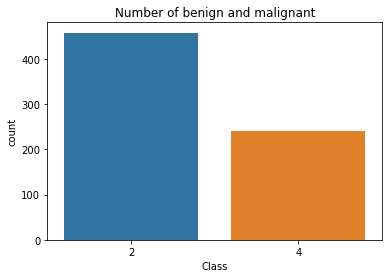

In [153]:
# Showing target column
ax = sns.countplot(y).set(title='Number of benign and malignant')
B, M = y.value_counts()
print('Number of Benign: ', B)
print('Number of Malignant : ', M)
plt.show()

In [157]:
# Set scaler and classification model
scaler = ['StandardScaler()', 'MinMaxScaler()', 'RobustScaler()', 'MaxAbsScaler()', 'Normalizer()']
model = ['DecisionTreeClassifier(criterion="entropy")', 'DecisionTreeClassifier(criterion="gini")', 'LogisticRegression()']#, 'SVC(kernel="linear", C=1e10)'

def best_comb(scaler, model):
    """Train model and find best combination of classifier and scaler

    Args:
        scaler: Array of scaler you want to use
        model: Array of classifier model you want to use

    Returns:
        combi: dictionary array including accuracy, scaler, classifier
    """
    best_acc = 0
    combi = [] #list element that stores the combination
    for element in scaler:
        scaler = eval(element)
        scaled = scaler.fit_transform(X)
        x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.2, random_state=42) #Using random_state to fixing random rate
        for element2 in model:
            classifier = eval(element2)
            classifier = classifier.fit(x_train,y_train)
            
            y_pred = classifier.predict(x_test)
            acc = accuracy_score(y_test, y_pred)
            #print(f'Using {classifier} in {scaler} score : {acc}')
            
            combi.append({'acc' : acc, 'scaler' : element, 'classifier' : classifier})

        
    def get_acc(element): #function for getting accuracy in combi
        return element['acc']
    
    #sort combination by accuracy, print 5 best combinations
    combi.sort(key=get_acc, reverse=True)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=7)
    res = []
    for i in range (0, 5):
        res.append(cross_val_score(combi[i]['classifier'], X, y, cv = kfold))
        temp = combi[i]
        temp['kFold'] = 5
        temp['acc'] = res[i].mean()
        combi.append(temp)
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    res = []
    for i in range (0, 5):
        res.append(cross_val_score(combi[i]['classifier'], X, y, cv = kfold))
        temp = combi[i]
        temp['kFold'] = 10
        temp['acc'] = res[i].mean()
        combi.append(temp)
    return combi

In [158]:
combi = best_comb(scaler, model)

In [159]:
df_combi = pd.DataFrame (combi)
print(f'Best 10 scaler, model, score in classificiation :', end='\n\n')
df_combi

Best 10 scaler, model, score in classificiation :



,acc,scaler,classifier,kFold
0,0.961346,StandardScaler(),LogisticRegression(),10.0
1,0.961346,MinMaxScaler(),LogisticRegression(),10.0
2,0.961346,RobustScaler(),LogisticRegression(),10.0
3,0.961346,MaxAbsScaler(),LogisticRegression(),10.0
4,0.945631,MinMaxScaler(),DecisionTreeClassifier(),10.0
5,0.935714,StandardScaler(),DecisionTreeClassifier(),NaN
6,0.935714,MinMaxScaler(),DecisionTreeClassifier(criterion='entropy'),NaN
7,0.935714,RobustScaler(),DecisionTreeClassifier(criterion='entropy'),NaN
8,0.935714,RobustScaler(),DecisionTreeClassifier(),NaN
9,0.935714,MaxAbsScaler(),DecisionTreeClassifier(criterion='entropy'),NaN


In [144]:
def val(combi, X, y):
    """Validation model with k-fold validation

    Args:
        scaler: Array of accuracy score, scaler and model
        X: Array of attributes except target attribute
        y: Array of target attribute

    Returns:
        best_acc: return best accuracy among combination of scaler and model
        best_scaler: return scaler which has best score
        best_model: return model which has best score
    """
res = []
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
for i in range (0, 5):
    res.append(cross_val_score(combi[i]['classifier'], X, y, cv = kfold))
    print(f"K-fold validation with {combi[i]['classifier']}, {combi[i]['scaler']} : {res[i]}")
    print(f"Average in K-fold validation: {res[i].mean()}")
    print(res[i], end='\n\n')

K-fold validation with LogisticRegression(), StandardScaler() : [0.95714286 0.92857143 0.98571429 0.99285714 0.95683453]
Average in K-fold validation: 0.9642240493319629
[0.95714286 0.92857143 0.98571429 0.99285714 0.95683453]

K-fold validation with LogisticRegression(), MinMaxScaler() : [0.95714286 0.92857143 0.98571429 0.99285714 0.95683453]
Average in K-fold validation: 0.9642240493319629
[0.95714286 0.92857143 0.98571429 0.99285714 0.95683453]

K-fold validation with LogisticRegression(), RobustScaler() : [0.95714286 0.92857143 0.98571429 0.99285714 0.95683453]
Average in K-fold validation: 0.9642240493319629
[0.95714286 0.92857143 0.98571429 0.99285714 0.95683453]

K-fold validation with LogisticRegression(), MaxAbsScaler() : [0.95714286 0.92857143 0.98571429 0.99285714 0.95683453]
Average in K-fold validation: 0.9642240493319629
[0.95714286 0.92857143 0.98571429 0.99285714 0.95683453]

K-fold validation with DecisionTreeClassifier(), MinMaxScaler() : [0.93571429 0.91428571 0.957